In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_lables),(testing_images,testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Let's see our trainig data how it looks like**

In [4]:
import matplotlib.pyplot as plt


9


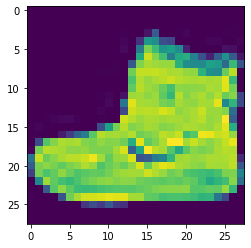

In [5]:
plt.imshow(training_images[0])
print(training_lables[0])

**normalization of the images lists**

In [6]:
training_images = training_images/255
testing_images = testing_images/255

In [7]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

**Design the model**

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(units=128,activation=tf.nn.relu),tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])

**Compile and train the model**

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [11]:
model.fit(training_images,training_lables,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8904


**Test our model performance of predecting labels**

In [12]:
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8721


[0.3510676622390747, 0.8720999956130981]

In [13]:
classifications = model.predict(testing_images)

In [14]:
print(classifications[5])

[4.4826022e-05 9.9994493e-01 3.8768480e-06 1.0076827e-06 1.3734734e-06
 7.8955800e-12 4.0564832e-06 3.4820935e-14 1.8059064e-08 4.5050193e-11]


In [16]:
print(testing_labels[2])

1
